In [2]:
import pickle
import datetime
import scipy.sparse as ss
import numpy as np
import pandas as pd
from corextopic import vis_topic as vt

In [3]:
from corextopic import corextopic as ct

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [21]:
import graphviz

In [1]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [5]:
with open('corex_summaries.pkl','rb') as cellar:
    [topic_list,topic_docs] = pickle.load(cellar)

In [6]:
topic_list

['0: wire, fuel, engine, light, battery, sensor, check, plug, switch, ignition, wiring, gauge, idle, pump, relay, power, computer, fuse, harness, spark',
 '1: lift, spring, shackle, tire, suspension, leaf, inch, shock, soa, kit, stock, rear, ride, body, flex, bds, rc, perch, bl, leafs',
 '2: frame, hole, bolt, mount, door, rust, cut, metal, weld, drill, seat, paint, plate, piece, windshield, hold, tub, steel, spray, upper',
 '3: forum, jeepforum, https, php, showthread, thread, read, search, manual, write, information, haynes, showt, info, hayne, index, faq, google, chilton, magazine',
 '4: carb, intake, exhaust, air, manifold, run, filter, weber, system, cat, carter, nutter, emission, header, pipe, flow, motor, bypass, muffler, tank',
 '5: money, buy, spend, price, pay, people, trail, live, save, stuff, rig, love, street, deal, mud, daily, happy, plus, dd, decide',
 '6: start, oil, time, leak, work, change, clean, gas, water, right, let, cold, warm, gasket, week, today, notice, pan, b

In [7]:
topic_docs

[('quote originally post by notmyj a Cat C15 tip the scale at close to 3100lbs -PRON- an Inline with a dislacement of l cu in the C-15 be often find in big rig -PRON- want power yeah -PRON- get that 625HP @ rpm lb / ft of torque @ 1200rpm that s not a typo the cat c32 have a 32L v12 turbo diesel google -PRON-',
  0.0)]

In [8]:
with open('corex_main_output.pkl','rb') as cellar:
    model_objects = pickle.load(cellar)

In [9]:
corex_vectorizer = model_objects[0]
doc_word_matrix = model_objects[1]
word_list = model_objects[2]
corex_model = model_objects[3]

In [10]:
t = []
# List all topics from the CorEx topic model, 
# check against pickled values
topics = corex_model.get_topics(n_words=20)
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    t.append('{}: '.format(n) + ', '.join(topic_words))
t == topic_list

True

In [39]:
vt.vis_rep(corex_model, column_label=word_list, prefix='topic-model-example')

Print topics in text file


In [11]:
corex_model.get_topics(topic=5, n_words=10, print_words=False)

[(16459, 0.03371981563331137),
 (3522, 0.026446087395177877),
 (24447, 0.025644792577020882),
 (19909, 0.02045070897472525),
 (18668, 0.020114951952615395),
 (18796, 0.01820403510129285),
 (27014, 0.016994191357873237),
 (14929, 0.015631816103999538),
 (22600, 0.013975093017003839),
 (25199, 0.01356897533684442)]

In [12]:
corex_model.clusters[45:55]

array([12, 11, 16,  5,  4,  1, 11,  3,  3, 15])

In [13]:
word_list[45:55]

['aboout',
 'aborbe',
 'abosloutly',
 'abotu',
 'abou',
 'abought',
 'abour',
 'abouth',
 'abouve',
 'abovr']

In [14]:
# Let's check out top topic docs
top_docs = []
for i in range(20):
    top_docs.append(corex_model.get_top_docs(topic=i, n_docs=1))

In [15]:
top_docs[1][0][0]

"do -PRON- make -PRON- oculd have swear -PRON- see -PRON- somewhere -PRON- get a yj with and want to put new spring this spring everywhere -PRON- look -PRON- find ' ome spring but no 2' -PRON- know -PRON- know -PRON- only half inch but -PRON- do SOA in the fall and do not wanna be toooooo high anyone get part number or website"

In [16]:
doc_topic_prob_matrix = corex_model.p_y_given_x
doc_topic_prob_matrix.shape

(47129, 20)

In [17]:
bulk_probs = doc_topic_prob_matrix.sum(axis=0)
bulk_probs.shape

(20,)

In [18]:
bulk_probs

array([6599.91458345, 6621.67246245, 7595.24116956, 3430.7998911 ,
       4349.22122842, 8552.06637297, 7889.83927577, 7287.11982845,
       7823.33450116, 7527.77248885, 8513.86714408, 4592.00465353,
       5365.7165661 , 4930.5139869 , 3580.17614641, 5003.44033286,
       8806.58694161, 5703.71109453, 8308.5670263 , 7011.66985545])

In [19]:
bulk_probs.sum()

129493.23554996868

In [20]:
norm_probs = bulk_probs * (47129.0/bulk_probs.sum())
norm_probs

array([2402.03569771, 2409.95446718, 2764.28432389, 1248.63794917,
       1582.8969475 , 3112.52039058, 2871.50316114, 2652.14371188,
       2847.29878082, 2739.72913041, 3098.61779984, 1671.25785681,
       1952.8499305 , 1794.45816379, 1303.00336452, 1820.99967188,
       3205.15302756, 2075.86287448, 3023.89892197, 2551.89382838])

In [21]:
norm_probs.astype(int)

array([2402, 2409, 2764, 1248, 1582, 3112, 2871, 2652, 2847, 2739, 3098,
       1671, 1952, 1794, 1303, 1820, 3205, 2075, 3023, 2551])

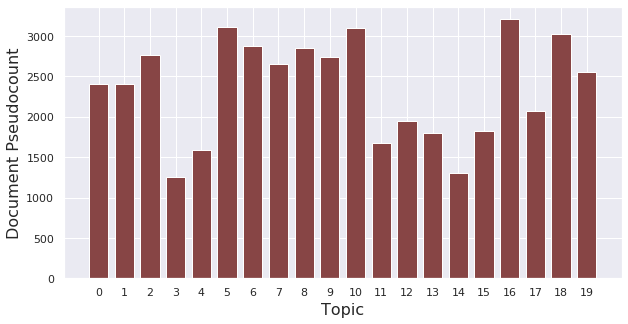

In [51]:
plt.figure(figsize=(10,5))
plt.bar(range(norm_probs.shape[0]), norm_probs, color='#874545', width=0.75)
plt.xlabel('Topic', fontsize=16)
plt.xticks(list(range(0,20)))
plt.ylabel('Document Pseudocount', fontsize=16);

In [22]:
count_data = [go.Bar(x=tuple(range(20)),y=norm_probs.astype(int),
                    marker=dict(color='#874545'))]
count_layout = go.Layout(title='jeepforum.com Post Pseudocounts',
                        xaxis={'title':'Topic'},
                        yaxis={'title':'Pseudocount (Normalized Probability Sum)'})
count_fig = go.Figure(data=count_data,layout=count_layout)
py.iplot(count_fig,filename='jeepforum-corex-topic-pseudocounts')

In [34]:
corex_model.tc

6.832086325691036

In [35]:
topic_scores = corex_model.tcs

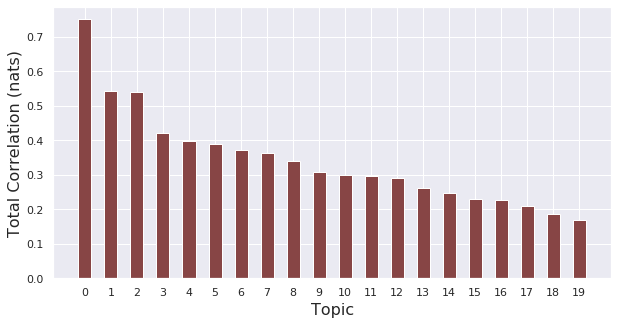

In [44]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_scores.shape[0]), topic_scores, color='#874545', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.xticks(list(range(0,20)))
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [4]:
corr_data = [go.Bar(x=tuple(range(20)),y=topic_scores,
                    marker=dict(color='#874545'))]
corr_layout = go.Layout(title='jeepforum.com Topic Correlation',
                        xaxis={'title':'Topic'},
                        yaxis={'title':'Total Correlation'})
corr_fig = go.Figure(data=corr_data,layout=corr_layout)
py.iplot(corr_fig,filename='jeepforum-corex-topic-scores')

NameError: name 'topic_scores' is not defined

In [24]:
corex_model.get_topics(topic=5, n_words=10, print_words=True)

[('money', 0.03371981563331137),
 ('buy', 0.026446087395177877),
 ('spend', 0.025644792577020882),
 ('price', 0.02045070897472525),
 ('pay', 0.020114951952615395),
 ('people', 0.01820403510129285),
 ('trail', 0.016994191357873237),
 ('live', 0.015631816103999538),
 ('save', 0.013975093017003839),
 ('stuff', 0.01356897533684442)]

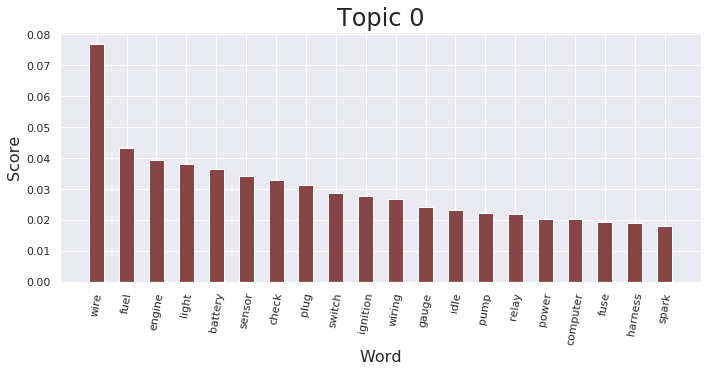

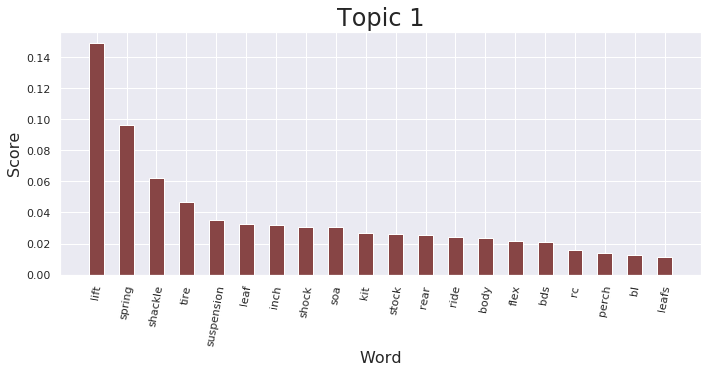

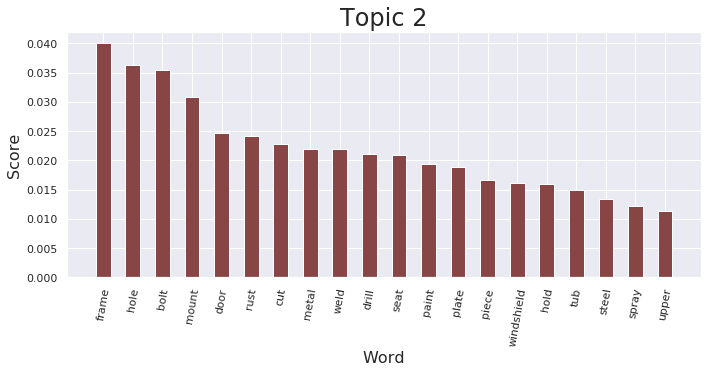

In [57]:
for i in range(3):
    scores = corex_model.get_topics(topic=i, n_words=20, print_words=True)
    x, y = zip(*scores)
    plt.figure(figsize=(10,5))
    plt.bar(tuple(range(len(x))), y, color='#874545', width=0.5)
    plt.xlabel('Word', fontsize=16)
    plt.xticks(ticks=tuple(range(len(x))), labels=x, rotation=80)
    plt.ylabel('Score', fontsize=16)
    plt.tight_layout()
    plt.title('Topic '+str(i), fontsize=24)
    plt.show;

In [56]:
plt.close('all')

In [70]:
for i in range(3):
    scores = corex_model.get_topics(topic=i, n_words=20, print_words=True)
    x, y = zip(*scores)
    data = [go.Bar(x=x,y=y,marker=dict(color='#874545'))]
    layout = go.Layout(title='jeepforum.com Topic '+str(i)+' Word Scores',
                            xaxis={'title':'Word'},
                            yaxis={'title':'Score'})
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig,filename='jeepforum-corex-topic-'+str(i)+'-words')